In [ ]:
import matplotlib.pylab as plt
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path_image = '/content/gdrive/My Drive/autobot/custom/Lane_data/image158.jpg'

720 1280


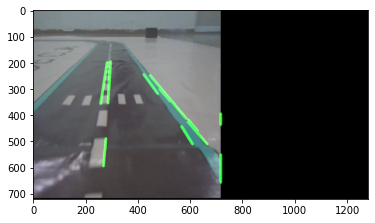

In [ ]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

img = cv2.imread(path_image)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


########
height = img.shape[0]
width = img.shape[1]

print(height,width)
region_of_interest_vertices = [
    (0, (height-20)),
    (width/8, height/8),
    (width-5, (height-20))
]

edges = cv2.Canny(img_gray, 100, 200)

cropped_image = region_of_interest(edges,
                np.array([region_of_interest_vertices], np.int32),)

lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)

image_with_lines = drow_the_lines(img, lines)
plt.imshow(image_with_lines,cmap='gray')
plt.show()